In [1]:
import sys
sys.path.append('/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/')
import ptyrex
from ptyrex import np
from ptyrex import plt
from ptyrex import tb

ImportError: No module named 'cv2'


2020-07-03 09:49:08,956:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/pyplot.py:225:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
input_dir1 = '/dls/i13-1/data/2019/cm22975-4/processing/ptyrex/set_number_1_of_2275959_20200507-090747.hdf'
input_dir2 = '/dls/i13-1/data/2019/cm22975-4/processing/ptyrex/set_number_2_of_2275959_20200507-091139.hdf'

In [3]:
def fft(ar):
    ar = np.fft.fftshift(np.fft.fft2(ar))
    return ar
def ifft(ar):
    ar = np.fft.ifft2(np.fft.fftshift(ar))
    return ar
def get_frc(ar1, ar2, dx):
    ar1 = fft(ar1)
    ar2 = fft(ar2)
    frc = np.zeros(np.uint32(ar1.shape[0]/2))
    two_sig = np.zeros(np.uint32(ar1.shape[0]/2))
    one_t = np.zeros(np.uint32(ar1.shape[0]/2))
    half_t = np.zeros(np.uint32(ar1.shape[0]/2))
    
    two_sig_lim_reached = False
    one_t_lim_reached = False
    half_t_lim_reached = False
    
    res_r = ar1.shape[0]/2
    for r in range(frc.shape[0]):
        ring_mask = np.abs(tb.genAp(ar1.shape, r+1) * tb.genStop(ar1.shape, r))
        npr = np.sum(ring_mask)
        ar1_r = ar1 * ring_mask
        ar2_r = ar2 * ring_mask
        frc[r] = np.sum(ar1_r * np.conj(ar2_r)) / np.sqrt( np.sum(np.square(np.abs(ar1_r))) * np.sum(np.square(np.abs(ar2_r))) )
        two_sig[r] = 2 / np.sqrt(npr/2)
        one_t[r] = (0.5+(2.4142/np.sqrt(npr))) / (1.5+(1.4142/np.sqrt(npr)))
        half_t[r] = (0.2071+(1.9102/np.sqrt(npr))) / (1.2071+(0.9102/np.sqrt(npr)))
        
        if r>1:
            if frc[r] <= two_sig[r] and two_sig_lim_reached == False:
                two_sig_r = r
                two_sig_lim_reached = True
            if frc[r] <= one_t[r] and not one_t_lim_reached:
                one_t_r = r
                one_t_lim_reached = True
            if frc[r] <= half_t[r] and not half_t_lim_reached:
                half_t_r = r
                half_t_lim_reached = True
    
    #print("dx", dx)
    u = 1/dx
    du = u/ar1.shape[0]
    du /= 1e6   
    two_sig_lim = 1e9/(float(two_sig_r) * float(du) * 1e6)
    one_t_lim = 1e9/(float(one_t_r) * float(du) * 1e6)
    half_t_lim = 1e9/(float(half_t_r) * float(du) * 1e6)
    
    x_axis = np.arange(2, ar1.shape[0]/2) * du
    plt.figure()
    plt.plot(x_axis, frc[2:], color = 'k')
    plt.plot(x_axis, two_sig[2:], color = 'r')
    plt.plot(x_axis, one_t[2:], color = 'g')
    plt.plot(x_axis, half_t[2:], color = 'b')
    plt.axvline(x=two_sig_r*du, color='r', linestyle='--', label="Two Sigma")
    plt.axvline(x=one_t_r*du, color='g', linestyle='--', label="One Bit")
    plt.axvline(x=half_t_r*du, color='b', linestyle='--', label="Half Bit")
    plt.ylabel('Ring Correlation')
    plt.xlabel('Reciprocal ums')
    plt.title('FRC\n Two Sigma Resolution = %fnm\n One Bit Resolution = %fnm\n Half Bit Resolution = %fnm' %(two_sig_lim, one_t_lim, half_t_lim))
    plt.legend()
    plt.show()
    
    return

In [4]:
f = ptyrex.h5py.File(input_dir1, 'r')
obj = f['entry_1']['process_1']['output_1']['object']
dx_1 = np.squeeze(np.array(f['entry_1']['process_1']['common_1']['dx']))[0]
obj_ar1 = np.squeeze(np.array(obj))
f.close()

f = ptyrex.h5py.File(input_dir2, 'r')
obj = f['entry_1']['process_1']['output_1']['object']
dx_2 = np.squeeze(np.array(f['entry_1']['process_1']['common_1']['dx']))[0]
obj_ar2 = np.squeeze(np.array(obj))
f.close()

obj_ar1 = ptyrex.core.toolbox.cut2(obj_ar1,[150, 200])
obj_ar2 = ptyrex.core.toolbox.cut2(obj_ar2,[150, 200])

In [5]:
obj_ar_ft1 = fft(obj_ar1)
obj_ar_ft2 = fft(obj_ar2)

2020-07-03 09:49:09,525:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1259:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2020-07-03 09:49:09,527:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05
2020-07-03 09:49:09,528:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
2020-07-03 09:49:09,529:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal bold normal>) = 10.335
2020-07-03 09:49:09,531:/dls_sw/apps/pyth

2020-07-03 09:49:09,553:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05
2020-07-03 09:49:09,554:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
2020-07-03 09:49:09,555:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
2020-07-03 09:49:09,555:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-Regular.otf) normal normal 400 normal>) = 10.05
2020-07-03 09:49:09,556:/dls_sw/apps/python/anaconda/4.

2020-07-03 09:49:09,578:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebuc.ttf) normal normal 400 normal>) = 10.05
2020-07-03 09:49:09,579:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 11.05
2020-07-03 09:49:09,580:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-Regular.ttf) normal normal regular normal>) = 10.05
2020-07-03 09:49:09,581:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-Bold.otf) normal normal bold normal>) = 10.335
2020-07-03 09:49:09,582:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pyt

2020-07-03 09:49:09,603:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebucbd.ttf) normal normal bold normal>) = 10.335
2020-07-03 09:49:09,603:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMonoBoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-07-03 09:49:09,604:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree-Bold.ttf) normal normal bold normal>) = 10.335
2020-07-03 09:49:09,604:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-Medium.ttf) normal normal medium normal>) = 10.145
2020-07-03 09:49:09,605:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib

2020-07-03 09:49:09,627:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Light.ttf) normal normal light normal>) = 10.24
2020-07-03 09:49:09,632:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'David CLM' (DavidCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-07-03 09:49:09,633:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-BoldItalic.ttf) italic normal bold condensed>) = 11.535
2020-07-03 09:49:09,633:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Bold-Italic.ttf) italic normal bold normal>) = 11.335
2020-07-03 09:49:09,634:/dls_sw/apps/python/

2020-07-03 09:49:09,656:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Regular.otf) normal normal roman normal>) = 10.145
2020-07-03 09:49:09,657:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Malayalam' (Lohit-Malayalam.ttf) normal normal 400 normal>) = 10.05
2020-07-03 09:49:09,658:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Tahoma' (tahoma.ttf) normal normal 400 normal>) = 10.05
2020-07-03 09:49:09,660:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-Demi.otf) normal normal book normal>) = 10.05
2020-07-03 09:49:09,661:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7

2020-07-03 09:49:09,689:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-07-03 09:49:09,690:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-Regular.otf) normal normal 400 normal>) = 10.05
2020-07-03 09:49:09,690:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-BoldItalic.otf) italic normal bold normal>) = 11.335
2020-07-03 09:49:09,691:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSans.ttf) normal normal 400 normal>) = 10.05
2020-07-03 09:49:09,691:/dls_sw/apps/python/anaconda/

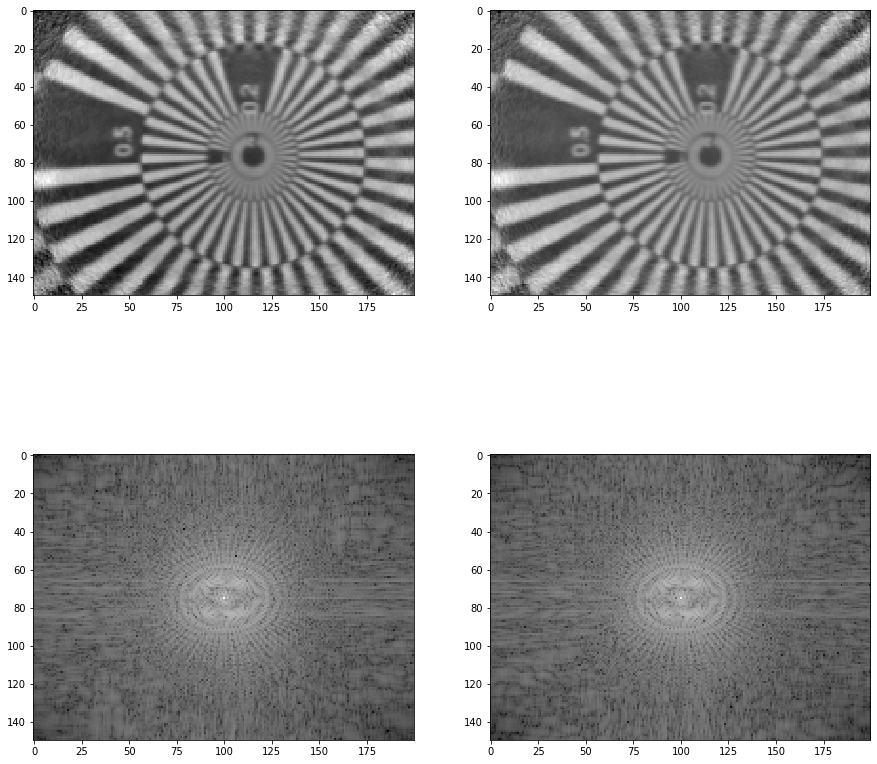

In [6]:
plt.figure('Inputs', figsize=[15,15])

plt.gray()
plt.subplot(2,2,1)
plt.imshow(np.angle(obj_ar1))
plt.subplot(2,2,2)
plt.imshow(np.angle(obj_ar2))
plt.subplot(2,2,3)
plt.imshow(np.log(np.abs(obj_ar_ft1)))
plt.subplot(2,2,4)
plt.imshow(np.log(np.abs(obj_ar_ft2)))
plt.show()

/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
2020-07-03 09:49:10,544:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1259:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2020-07-03 09:49:10,546:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05
2020-07-03 09:49:10,546:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
2020-07-03 09:49:10,547:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/sit

2020-07-03 09:49:10,573:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05
2020-07-03 09:49:10,574:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05
2020-07-03 09:49:10,575:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
2020-07-03 09:49:10,576:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
2020-07-03 09:49:10,577:/dls_sw/apps/python/anaconda/

2020-07-03 09:49:10,600:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Abyssinica SIL' (AbyssinicaSIL-R.ttf) normal normal 400 normal>) = 10.05
2020-07-03 09:49:10,601:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebuc.ttf) normal normal 400 normal>) = 10.05
2020-07-03 09:49:10,601:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 11.05
2020-07-03 09:49:10,602:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-Regular.ttf) normal normal regular normal>) = 10.05
2020-07-03 09:49:10,602:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/py

2020-07-03 09:49:10,618:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans Narrow' (PTN57F.ttf) normal normal 400 condensed>) = 10.25
2020-07-03 09:49:10,618:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebucbd.ttf) normal normal bold normal>) = 10.335
2020-07-03 09:49:10,619:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMonoBoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-07-03 09:49:10,619:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree-Bold.ttf) normal normal bold normal>) = 10.335
2020-07-03 09:49:10,619:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python

2020-07-03 09:49:10,649:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifBold.ttf) normal normal bold normal>) = 10.335
2020-07-03 09:49:10,650:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Light.ttf) normal normal light normal>) = 10.24
2020-07-03 09:49:10,654:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'David CLM' (DavidCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-07-03 09:49:10,654:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-BoldItalic.ttf) italic normal bold condensed>) = 11.535
2020-07-03 09:49:10,655:/dls_sw/apps/python/anacon

2020-07-03 09:49:10,673:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-Regular.otf) normal normal regular normal>) = 10.05
2020-07-03 09:49:10,673:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Regular.otf) normal normal roman normal>) = 10.145
2020-07-03 09:49:10,674:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Malayalam' (Lohit-Malayalam.ttf) normal normal 400 normal>) = 10.05
2020-07-03 09:49:10,674:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Tahoma' (tahoma.ttf) normal normal 400 normal>) = 10.05
2020-07-03 09:49:10,675:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python

2020-07-03 09:49:10,689:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerif.ttf) normal normal 400 normal>) = 10.05
2020-07-03 09:49:10,690:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-07-03 09:49:10,690:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-Regular.otf) normal normal 400 normal>) = 10.05
2020-07-03 09:49:10,690:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-BoldItalic.otf) italic normal bold normal>) = 11.335
2020-07-03 09:49:10,691:/dls_sw/apps/python/anacond

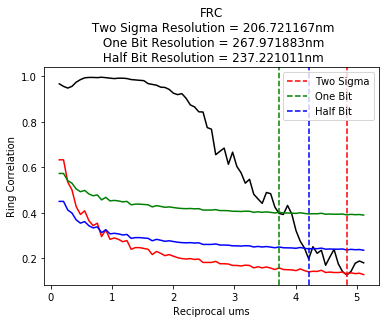

In [7]:
get_frc(obj_ar1, obj_ar2, dx_1)